<a href="https://colab.research.google.com/github/jxff2k/DataAnalytics/blob/main/Porter_Analysis_Project_by_Jeff_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PORTER DATASET**

Porter, India's largest marketplace for intra-city logistics, works with a wide range of
restaurants to deliver their items directly to customers. The company wants to estimate the
delivery time for each order based on various features, such as the items ordered, the
restaurant, and the availability of delivery partners.

**Aim:** To enhance which delivery duration will be optimal by reducing Idle Capacity for customer enhancement and retention.

**METHODOLOGY:**

1. Data Preprocessing and Cleaning
2. Handling Missing Values
3. Encoding Categorical Data Using One Hot Encoding
4. Outlier Analysis and Treatment
5. Feature Engineering and Data Visualization (Advanced EDA)

**Dataset Description and Dictionary**

The dataset includes the following information for each order:
1. market_id: Integer ID for the market where the restaurant is located
2. created_at: Timestamp at which the order was placed
3. actual_delivery_time: Timestamp when the order was delivered
4. store_primary_category: Category of the restaurant
5. order_protocol: Integer code value for the order protocol (e.g., through Porter,call to
restaurant, pre-booked, third-party, etc.)
6. total_items: Total number of items in the order
7. subtotal: Final price of the order
8. num_distinct_items: Number of distinct items in the order
9. min_item_price: Price of the cheapest item in the order
10. max_item_price: Price of the most expensive item in the order
11. total_onshift_partners: Number of delivery partners on duty when the order was placed
12. total_busy_partners: Number of delivery partners attending to other tasks
13. total_outstanding_orders: Total number of orders to be fulfilled at that moment

# **1. Dataset Information**


## **1.1. Loading the Dataset**

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/dataset.csv')

In [111]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [112]:
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (197428, 14)


In [113]:
print("Data type attributes:", df.dtypes)

Data type attributes: market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object




##**1.2. Information Regarding the data missing values**

In [114]:
(df.isnull().sum()/df.shape[0]) * 100

,0
market_id,0.499929
created_at,0.000000
actual_delivery_time,0.003546
store_id,0.000000
store_primary_category,2.411006
order_protocol,0.503981
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000


- The dataset includes 8% of unknown or missing values for partners type data.

##**1.3. Summary of the dataset**

In [115]:
df.describe().round(3)

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000,196433.000,197428.000,197428.000,197428.000,197428.000,197428.000,181166.000,181166.000,181166.000
mean,2.979,2.882,3.196,2682.331,2.671,686.218,1159.589,44.808,41.740,58.050
std,1.525,1.504,2.667,1823.094,1.630,522.039,558.411,34.527,32.146,52.662
min,1.000,1.000,1.000,0.000,1.000,-86.000,0.000,-4.000,-5.000,-6.000
25%,2.000,1.000,2.000,1400.000,1.000,299.000,800.000,17.000,15.000,17.000
50%,3.000,3.000,3.000,2200.000,2.000,595.000,1095.000,37.000,34.000,41.000
75%,4.000,4.000,4.000,3395.000,3.000,949.000,1395.000,65.000,62.000,85.000
max,6.000,7.000,411.000,27100.000,20.000,14700.000,14700.000,171.000,154.000,285.000


In [116]:
df.info()  ## Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [117]:
sum(df['subtotal'])

529567324

In [118]:
df[df['actual_delivery_time'].isna()]['subtotal'].sum()

np.int64(19768)

In [119]:
df[df['actual_delivery_time'].isna()]['subtotal'].sum() * 100/sum(df['subtotal'])

np.float64(0.003732858713918686)

In [189]:
529567324/30

17652244.133333333

##**1.4. Handing the Missing Values and its techniques**

In [120]:
df['total_busy_partners'] = df['total_busy_partners'].abs()
df['total_outstanding_orders'] = df['total_outstanding_orders'].abs()
df['total_onshift_partners'] = df['total_onshift_partners'].abs()
df['min_item_price'] = df['min_item_price'].abs()

In [121]:
df['store_primary_category'] = df['store_primary_category'].fillna('unknown')
df['market_id'] = df['market_id'].fillna(0)
df['order_protocol'] = df['order_protocol'].fillna(0.0)
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].mean())
df['total_busy_partners']= df['total_busy_partners'].fillna(df['total_onshift_partners'].mean())
df['total_outstanding_orders']= df['total_outstanding_orders'].fillna(df['total_onshift_partners'].mean())

All the numerical datatypes have been filled to 0 and categorical data ,i.e., store_primary_category is to 'Unknown'.

##**1.5. Changing the data types**


In [122]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['market_id'] = df['market_id'].astype(object)
df['order_protocol'] = df['order_protocol'].astype(object)

Changed the data type **created_at** and **Actual_delivery_time** to datetime format and also **market_id** and **order_protocol** to string format

##**1.6. Creation of the column by extracting day of the week and hour by time dataframe**

In [123]:
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

In [124]:
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at'])/np.timedelta64(1,'h')

The above code for **delivery_duration** created involves timedelta from **0 - 1** format ensures hour basis analysis.

Here, **0.5 = 0.5 x 60 = 30 minutes**

In [125]:
max(df['actual_delivery_time']) - min(df['actual_delivery_time'])

Timedelta('29 days 06:47:20')

In [196]:
sum(df_final_total['total_outstanding_orders']) * 100/sum(df['total_outstanding_orders'])

94.4864704330604

##**1.7. Droping the missing values**

In [126]:
df.dropna(subset = ['actual_delivery_time'], inplace = True)
df.dropna(subset = ['delivery_duration'], inplace = True)

In [127]:
df.info() ## Checking the missing values and data

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 197421 non-null  object        
 1   created_at                197421 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197421 non-null  object        
 4   store_primary_category    197421 non-null  object        
 5   order_protocol            197421 non-null  object        
 6   total_items               197421 non-null  int64         
 7   subtotal                  197421 non-null  int64         
 8   num_distinct_items        197421 non-null  int64         
 9   min_item_price            197421 non-null  int64         
 10  max_item_price            197421 non-null  int64         
 11  total_onshift_partners    197421 non-null  float64       
 12  total_b

Had to drop values for **actual_delivery_time** and **delivery_duration** as they were producing irrelevant results which was causing error to the datatype.


#**2. Exploratory Data Analysis (EDA)**

/tmp/ipython-input-3067925909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'day_of_week', data = df, palette = 'hls')


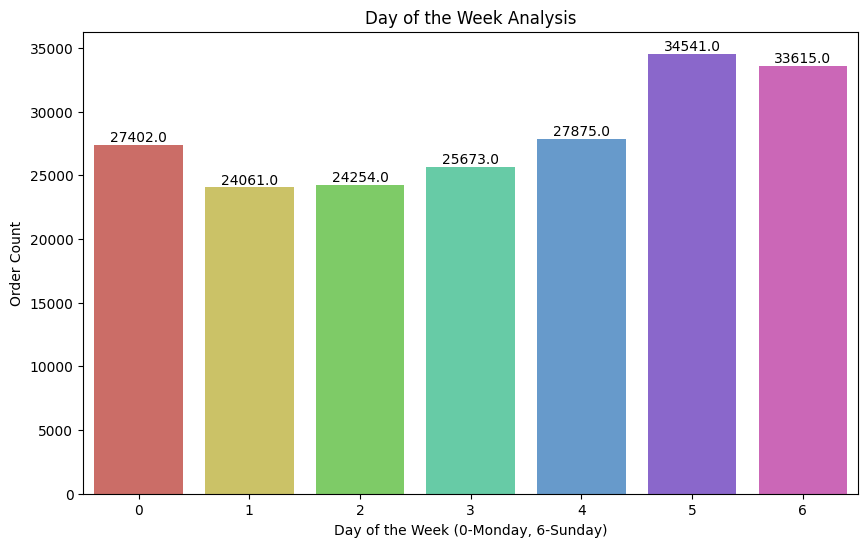

In [128]:
## day of week by order counts

plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'day_of_week', data = df, palette = 'hls')
plt.title('Day of the Week Analysis')
plt.xlabel('Day of the Week (0-Monday, 6-Sunday)')
plt.ylabel('Order Count')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

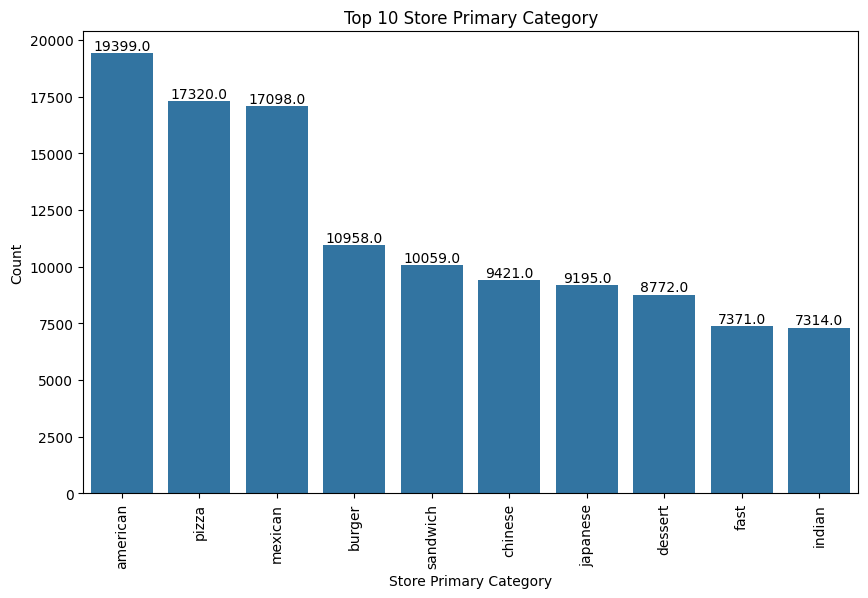

In [129]:
## Top 10 store primary category

top_10_store_primary_category = df['store_primary_category'].value_counts().head(10)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = top_10_store_primary_category.index, y = top_10_store_primary_category.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Store Primary Category')
plt.xlabel('Store Primary Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- **American, pizza** and **Mexican** Food types top for the customer preference acounting to collective contribution of **27%** to the data.

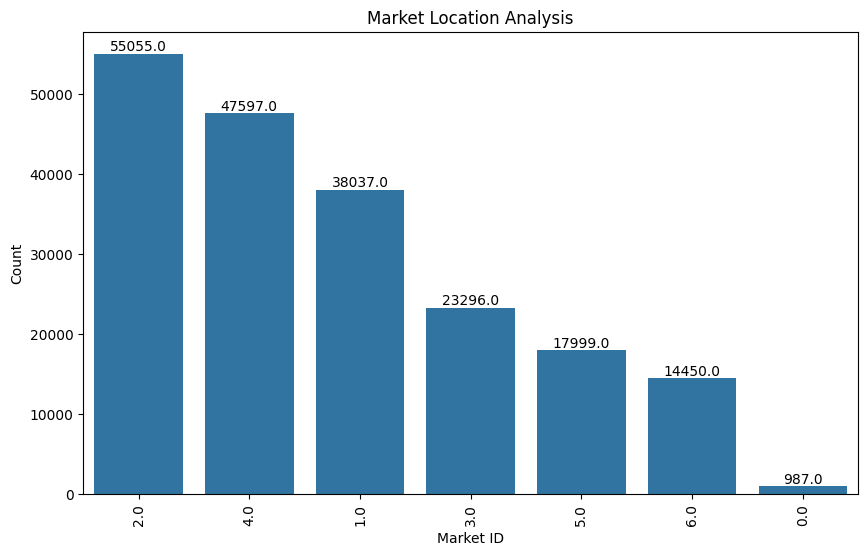

In [130]:
## Market Location Analysis
market_location = df['market_id'].value_counts()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = market_location.index, y = market_location.values, order= market_location.index)
plt.xticks(rotation = 90)
plt.title('Market Location Analysis')
plt.xlabel('Market ID')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

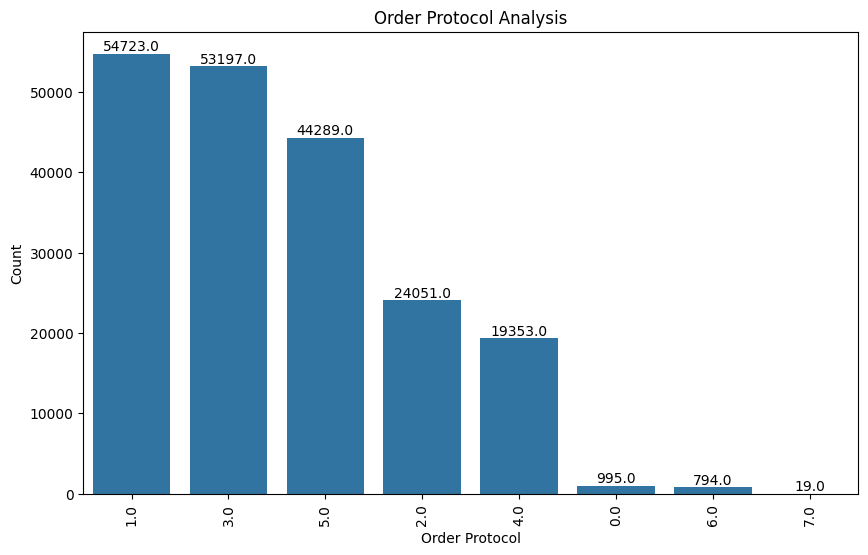

In [131]:
## Ordering methodology being used

order_protocol = df['order_protocol'].value_counts()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = order_protocol.index, y = order_protocol.values, order= order_protocol.index)
plt.xticks(rotation = 90)
plt.title('Order Protocol Analysis')
plt.xlabel('Order Protocol')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

In [132]:
# Calculate the total number of orders
total_orders = len(df['order_protocol'])

# Calculate the percentage of orders with order protocol 1.0
percentage_protocol_1 = (len(df[df['order_protocol'] == 1.0]) + len(df[df['order_protocol'] == 2.0])) * 100 / total_orders

print(f"The percentage of orders with order protocol 1.0 is: {percentage_protocol_1:.2f}%")

The percentage of orders with order protocol 1.0 is: 39.90%


**Terminologies Used:**

- **1.0** *Call to restaurant* – delivery partner/porter phones the restaurant and places the order manually.   
                    
- **2.0** *Through app/tablet (direct integration)* – order sent automatically through the DoorDash (or similar) system.            
- **3.0** *Pre-booked order* – scheduled by customer for later delivery.                                                            
- **4.0** *Third-party integration* – e.g., via a POS system or external ordering platform.                                         
- **5.0** *Porter-assisted/manual pickup* – partner walks in, places, and picks up the order (used in markets without integration).
- **6.0** *Marketplace email/fax protocol* – some restaurants (especially in older systems) received orders by email/fax.           
- **7.0** *Other special cases* – e.g., corporate catering, experimental protocols, or rare integrations.        



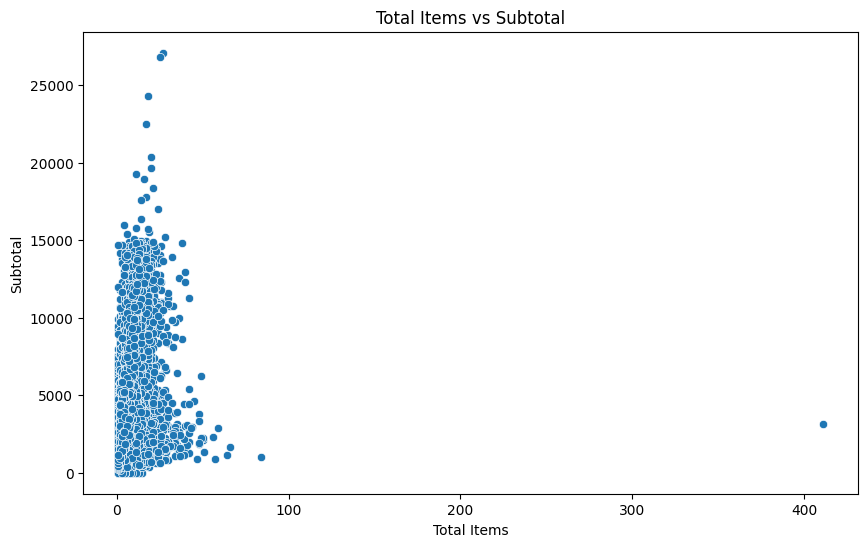

In [133]:
## Total items vs subtotal

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'total_items', y = 'subtotal', data = df)
plt.title('Total Items vs Subtotal')
plt.xlabel('Total Items')
plt.ylabel('Subtotal')
plt.show()

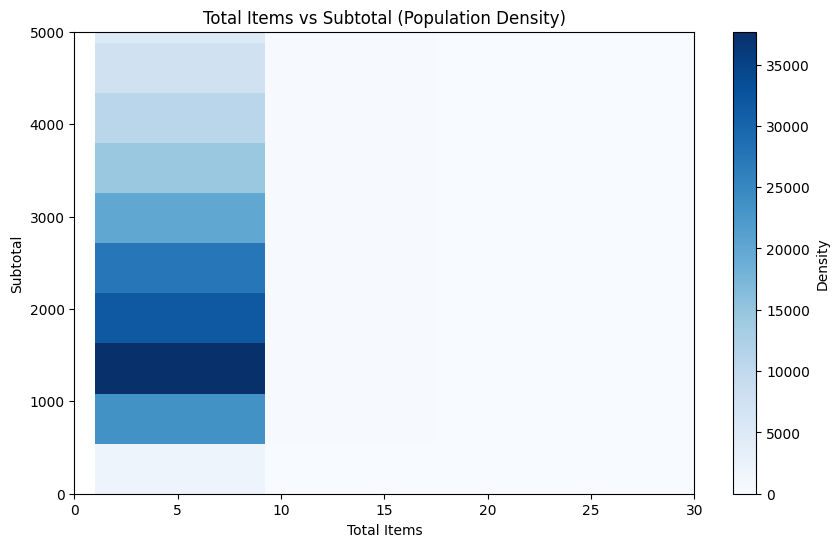

In [134]:
plt.figure(figsize = (10,6))
plt.hist2d(df['total_items'], df['subtotal'], bins = 50, cmap = 'Blues')
plt.colorbar(label = 'Density')
plt.title('Total Items vs Subtotal (Population Density)')
plt.xlabel('Total Items')
plt.ylabel('Subtotal')
## Adjustment of coordinates for better visualization
plt.xlim(0, 30)
plt.ylim(0, 5000)
plt.show()

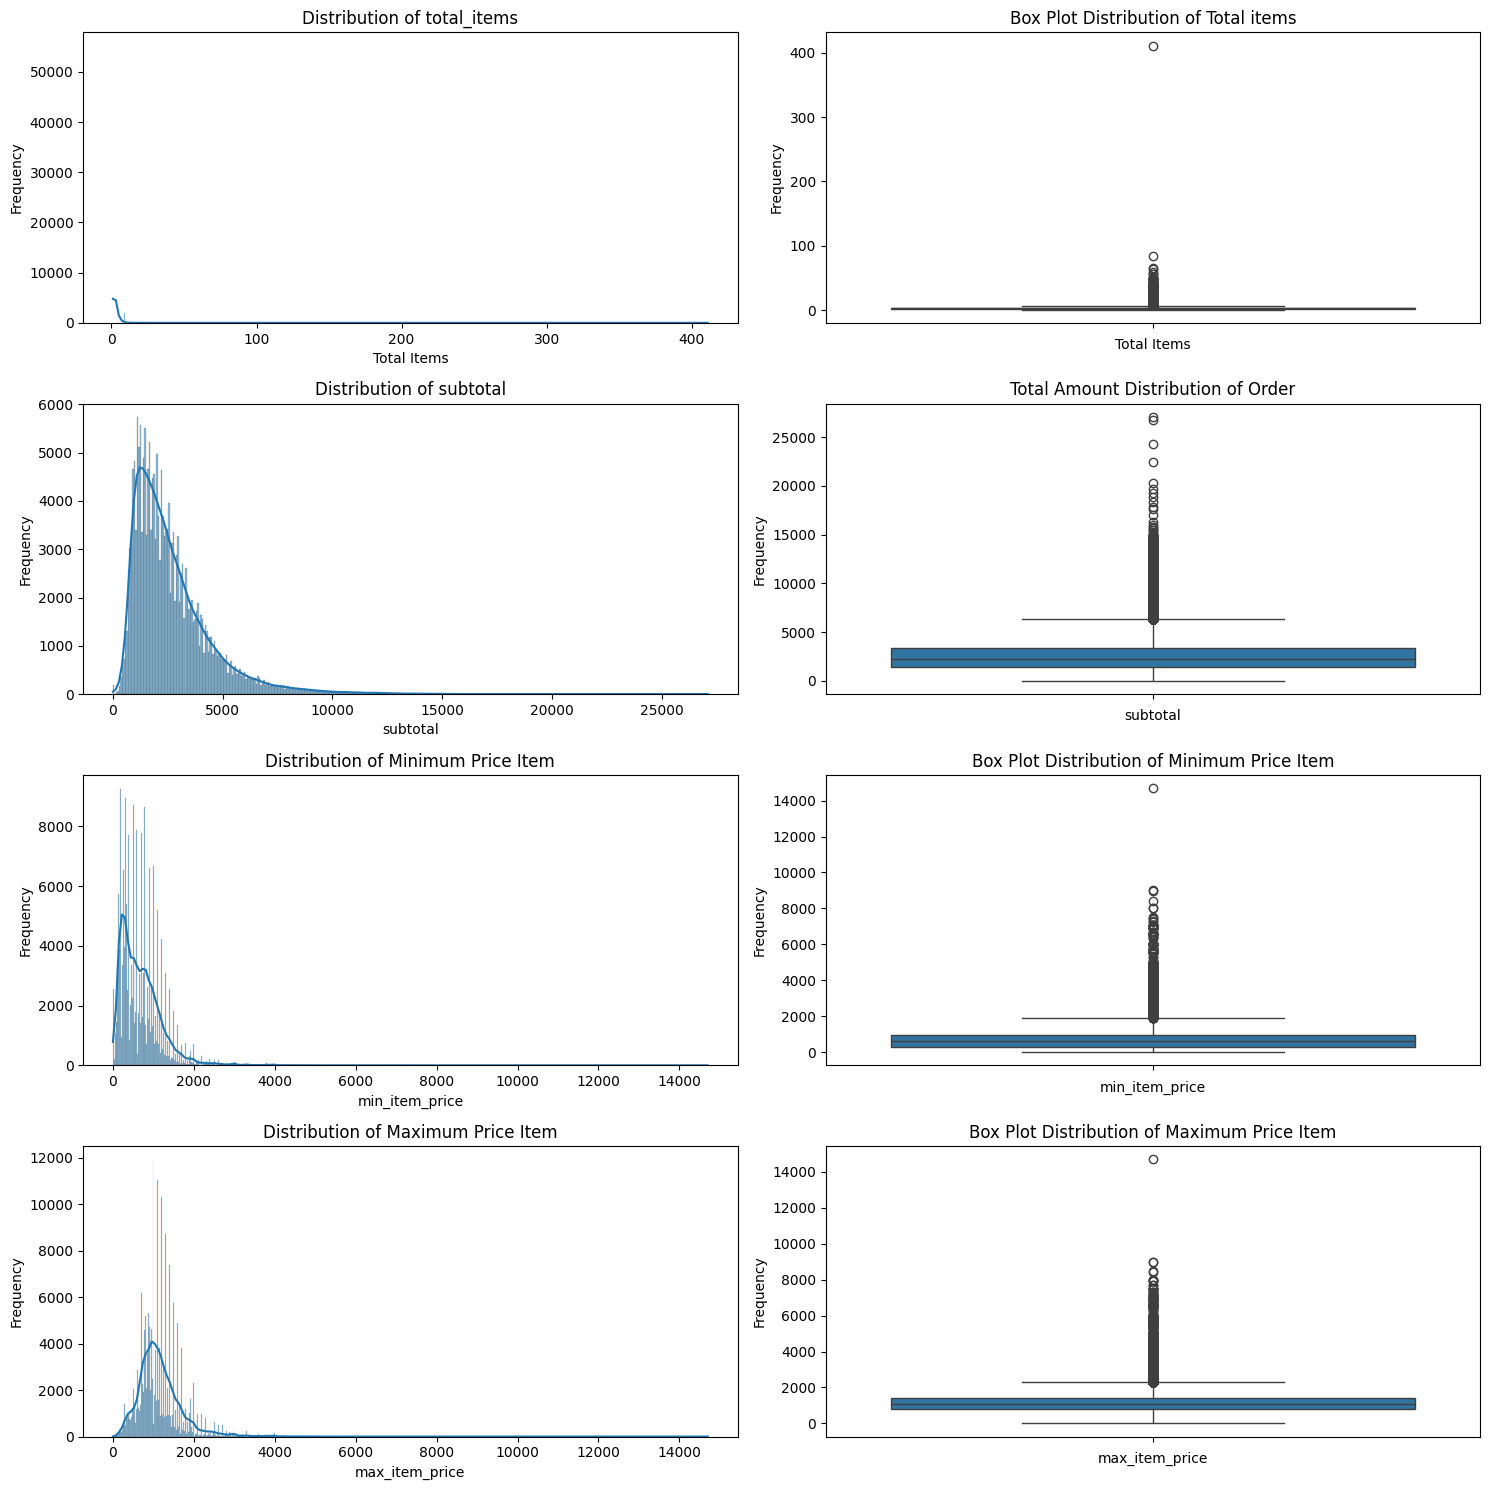

In [135]:
## Subplots (total_items, subtotal, min_item_price, and max_item_price)

plt.figure(figsize = (15,15))
plt.subplot(4,2,1)
sns.histplot(df['total_items'], kde = True)
plt.title('Distribution of total_items')
plt.xlabel('Total Items')
plt.ylabel('Frequency')

plt.subplot(4,2,2)
sns.boxplot(df['total_items'])
plt.title('Box Plot Distribution of Total items')
plt.xlabel('Total Items')
plt.ylabel('Frequency')

plt.subplot(4,2,3)
sns.histplot(df['subtotal'], kde = True)
plt.title('Distribution of subtotal')
plt.xlabel('subtotal')
plt.ylabel('Frequency')

plt.subplot(4,2,4)
sns.boxplot(df['subtotal'])
plt.title('Total Amount Distribution of Order')
plt.xlabel('subtotal')
plt.ylabel('Frequency')

plt.subplot(4,2,5)
sns.histplot(df['min_item_price'], kde = True)
plt.title('Distribution of Minimum Price Item')
plt.xlabel('min_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,6)
sns.boxplot(df['min_item_price'])
plt.title('Box Plot Distribution of Minimum Price Item')
plt.xlabel('min_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,7)
sns.histplot(df['max_item_price'], kde = True)
plt.title('Distribution of Maximum Price Item')
plt.xlabel('max_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.boxplot(df['max_item_price'])
plt.title('Box Plot Distribution of Maximum Price Item')
plt.xlabel('max_item_price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

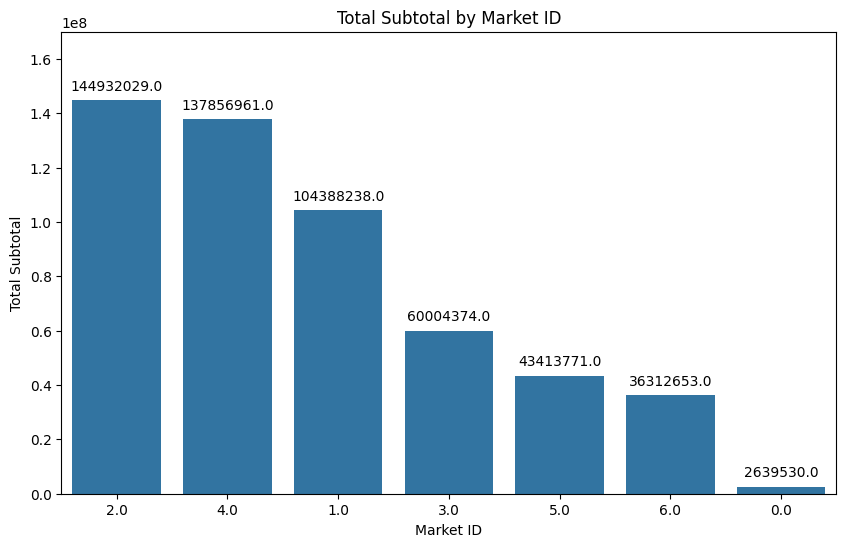

In [136]:
## Total Subtotal by Market ID

data_group = df.groupby('market_id')['subtotal'].sum().reset_index().sort_values('subtotal', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='market_id', y='subtotal', data=data_group, order=data_group['market_id'])
plt.title('Total Subtotal by Market ID')
plt.xlabel('Market ID')
plt.ylabel('Total Subtotal')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylim(0, 170000000)

plt.show()


**- Observations:**

1. There is a **positive trend** on **revenue and the number of users** order by the respective market location making it viably highest contributor on **Market 2.0**.

2. Customers whose purchase item goes upto **10 total items** are the highest contributors in terms of revenue for the firms growth making it **2000 amount** on a single purchase. This would give an **inverse relationship** factor influenced on **price and demand**.

3. There are **Market locations** which are unknown denoted by **0.0** contributing to **0.49%** whose part of revenue accounts to upto **~ 26.4 lakhs**.

4. Order protocol 1.0 (**Call to restaurant by delivery guy**) and 3.0 (**Scheduled for a future use**) followed by 5.0 (**Manual pickups**) are so common types of delivery wherein all of these order types represents more customer satisfaction and best mode of service. Order protocol 1.0 and 3.0 contribut to **39.90%** making it a more convinient choice and not requirement of an extra fees which would be seen dominantly in pre booking order and Third party integration and other modes making it a bit expensive mode.

5. We have highest on the day of **Saturday** and **Sunday** giving order counts of around 34,541 and 33,615 making these as the days of most sales.

6. **American, pizza** and **Mexican** Food types top for the customer preference acounting to collective contribution of **27%** to the data.

7. The total items purchased by each customer is higher in demand, i.e, more than **30000 orders** being made, for category **1000 - 2000** which makes it more viable option for any **Income based category of customers**.



#**3. Encoding Categorical Values**

In [137]:
from sklearn.preprocessing import OneHotEncoder
df_cat = df[['order_protocol','store_primary_category']]
ohe = OneHotEncoder()
df_cat_encoded = ohe.fit_transform(df_cat).toarray()

In [138]:
df_cat_encoded = pd.DataFrame(df_cat_encoded,
                              columns = ohe.get_feature_names_out(df_cat.columns), index = df.index)

In [139]:
df_final = pd.concat([df.drop(['order_protocol','store_primary_category'], axis=1),
                      df_cat_encoded],
                     axis=1)

df_final.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'hour', 'day_of_week', 'delivery_duration',
       'order_protocol_0.0', 'order_protocol_1.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0',
       'store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol',
       'store_primary_category_alcohol-plus-food',
       'store_primary_category_american', 'store_primary_category_argentine',
       'store_primary_category_asian', 'store_primary_category_barbecue',
       'store_primary_category_belgian', 'store_primary_category_brazilian',
       'store_primary_category_breakfast', 'store_primary_category_british',
       'store_primary_category_bub

#**4. Outlier Analysis**

In [140]:
col = ['subtotal', 'delivery_duration', 'total_items']

q1_st = df_final[col[0]].quantile(0.25)
q3_st = df_final[col[0]].quantile(0.75)

iqr_st = q3_st - q1_st

lower_bound_st = q1_st - 1.5 * iqr_st
upper_bound_st = q3_st + 1.5 * iqr_st

In [141]:
outliers_st = df_final[(df_final[col[0]] < lower_bound_st) | (df_final[col[0]] > upper_bound_st)]
print("Number of Outliers present (Sutotal): ",len(outliers_st))

Number of Outliers present (Sutotal):  9054


In [142]:
outliers_st.describe(include = [np.number]).round(3)

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
count,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,...,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000,9054.000
mean,7.882,8342.205,5.936,691.665,1822.653,51.487,47.828,67.150,6.204,3.196,...,0.000,0.014,0.031,0.001,0.046,0.001,0.026,0.001,0.003,0.017
std,3.814,1847.927,2.439,697.478,914.935,33.694,31.249,52.912,7.833,2.064,...,0.018,0.119,0.175,0.028,0.209,0.033,0.159,0.030,0.052,0.129
min,1.000,6388.000,1.000,0.000,257.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5.000,6938.250,4.000,300.000,1295.000,24.000,22.000,26.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,7.000,7791.500,6.000,550.000,1599.000,44.809,44.809,51.000,2.000,3.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,10.000,9200.000,7.000,895.000,2050.750,72.000,68.000,97.000,5.000,5.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,42.000,27100.000,20.000,14700.000,14700.000,158.000,148.000,285.000,23.000,6.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [143]:
## Removing Outliers for subtotal

df_final_st = df_final[(df_final[col[0]] >= lower_bound_st) & (df_final[col[0]] <= upper_bound_st)]
print("After Outlier Removal (Subtotal Correction): ",len(df_final_st))

After Outlier Removal (Subtotal Correction):  188367


In [144]:
q1_dd = df_final_st[col[1]].quantile(0.01)  ## Outlier Detection for Delivery Duration
q3_dd = df_final_st[col[1]].quantile(0.99)

iqr_dd = q3_dd - q1_dd

lower_bound_st = q1_dd - 1.5 * iqr_dd
upper_bound_st = q3_dd + 1.5 * iqr_dd

In [145]:
outliers_dd = df_final_st[(df_final_st[col[1]] < lower_bound_st) | (df_final_st[col[1]] > upper_bound_st)]
print("Outliers present in the data (Delivery Duration): ",len(outliers_dd))

Outliers present in the data (Delivery Duration):  57


In [146]:
df_final_dd = df_final_st[(df_final_st[col[1]] >= lower_bound_st) & (df_final_st[col[1]] <= upper_bound_st)]
print("After removal of Outliers within the whole data (Delivery Duration Correction): ", len(df_final_dd))

After removal of Outliers within the whole data (Delivery Duration Correction):  188310


In [147]:
q1_total = df_final_dd[col[2]].quantile(0.01)
q3_total = df_final_dd[col[2]].quantile(0.99)

iqr_total = q3_total - q1_total

lower_bound_total = q1_total - 1.5 * iqr_total
upper_bound_total = q3_total + 1.5 * iqr_total

In [148]:
outliers_total = df_final_dd[(df_final_dd[col[2]] < lower_bound_total) | (df_final_dd[col[2]] > upper_bound_total)]
print("Outliers present in the data (Total Items): ",len(outliers_total))

Outliers present in the data (Total Items):  189


In [149]:
df_final_total = df_final_dd[(df_final_dd[col[2]] >= lower_bound_total) & (df_final_dd[col[2]] <= upper_bound_total)]
print("After removal of Outliers within the whole data (Total Items Correction): ", len(df_final_total))

After removal of Outliers within the whole data (Total Items Correction):  188121


In [150]:
df_final_total.describe(include=[np.number]).iloc[:,:11] ## Rerunning the final dataset after treatemnt

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day_of_week,delivery_duration
count,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000,188121.000000
mean,2.940894,2410.418805,2.510209,686.629781,1128.469097,44.493511,41.718499,56.478803,8.575316,3.219901,0.784626
std,1.972954,1306.031352,1.394826,511.922589,513.797321,33.009404,30.754239,50.409523,8.681755,2.044897,0.301859
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028056
25%,2.000000,1390.000000,1.000000,299.000000,799.000000,18.000000,16.000000,19.000000,2.000000,1.000000,0.578889
50%,2.000000,2130.000000,2.000000,595.000000,1050.000000,41.000000,39.000000,44.808524,3.000000,3.000000,0.730278
75%,4.000000,3186.000000,3.000000,950.000000,1360.000000,61.000000,59.000000,79.000000,19.000000,5.000000,0.926944
max,23.000000,6387.000000,15.000000,6300.000000,6300.000000,171.000000,154.000000,278.000000,23.000000,6.000000,3.948333


/tmp/ipython-input-3638249807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_total['price_range'] = pd.cut(df_final_total['subtotal'],
/tmp/ipython-input-3638249807.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'price_range', data = df_final_total, palette = 'hls')


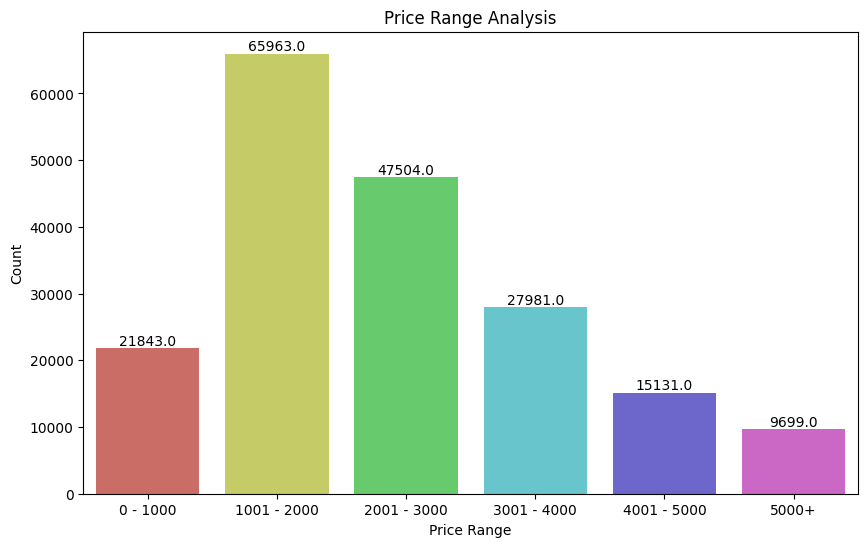

In [151]:
# Define bins for price ranges
bins = [0, 1000, 2000, 3000, 4000, 5000, df_final_total['subtotal'].max()]
labels = ['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000', '5000+']

# Create a new column with ranges as labels
df_final_total['price_range'] = pd.cut(df_final_total['subtotal'],
                                       bins=bins,
                                       labels=labels,
                                       include_lowest=True)

## Count plot for price range

plt.figure(figsize = (10,6))
sns.countplot(x = 'price_range', data = df_final_total, palette = 'hls')
plt.title('Price Range Analysis')
plt.xlabel('Price Range')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

In [152]:
len(df_final_total[df_final_total['price_range'] == '0 - 1000'])/len(df_final_total) * 100

11.61114389143158

**- Outlier Analysis:**

1. **4.5% of the Subtotal** are above **6387** whereby this is something that is beyond a single person purchase. Those numbers of data could highly be for small scale industries who takes orders in bulk and other category of markets which involve on leveraging their supply counts for a better optimal pricing stratergy.

2. **57 number of orders** exceed the **normal delivery duration** which comes to above 4 hours the main cause of this delay can be recording higher hours on delivery through mode of transports like **ships, trucks, freight**, etc. By giving a record of this delivery mode would disturb the *natural analysis* of the dataset where **most of the orders** are placed on nearby locations on road.

3. An **average person** could order upto **3-5 total items** for short term purpose which could maximum include food items on a need for a particular day or two. Others upto 10 total items or even more would be for get together, parties and other community meetings this would contribute to a higher set of categories generating more revenue for the firm. **189 orders** are above 23 total items this could be for a **lesser category of people** that would prefer more advanced options like **buffet**, etc.

4. Customers who purchase **upto 1000** are on **11.61%** whereas there is a huge increase from **1001 - 2000 and 2001 - 3000** to **55.05%** making this an ideal choice for any type of buyers which would incentivize them through various promotion schemes like **discounts, but 1 get 1**, etc. Other category after this range an evident **decline from 3000** above is seen meaning Customers arent ready to spent amount above this speciifc threshold. Major reason can be most of the Customers are given as **above average category** wherein spending above the amount would result them to a **loss of purchase**.

#**5. Advanced Data Visualization**

Text(0, 0.5, 'Frequency')

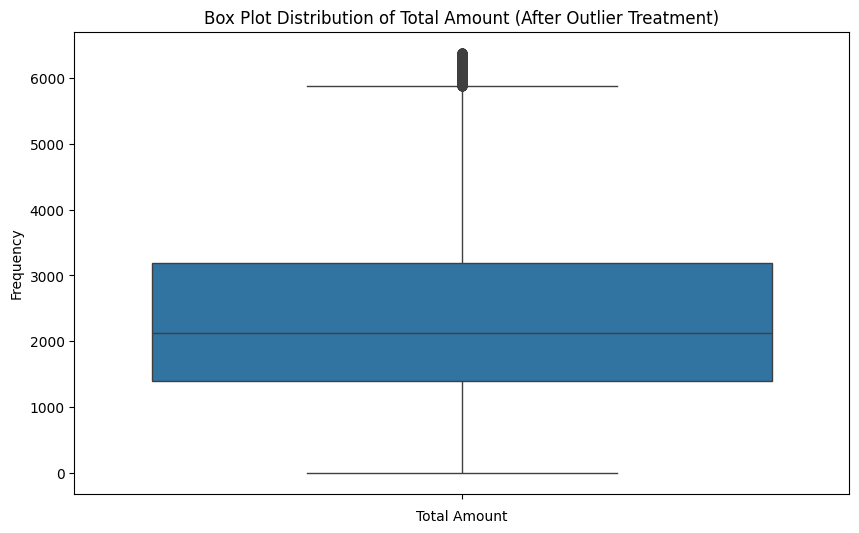

In [153]:
## Boxplot for subtotal

plt.figure(figsize = (10,6))
sns.boxplot(df_final_total['subtotal'])
plt.title('Box Plot Distribution of Total Amount (After Outlier Treatment)')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

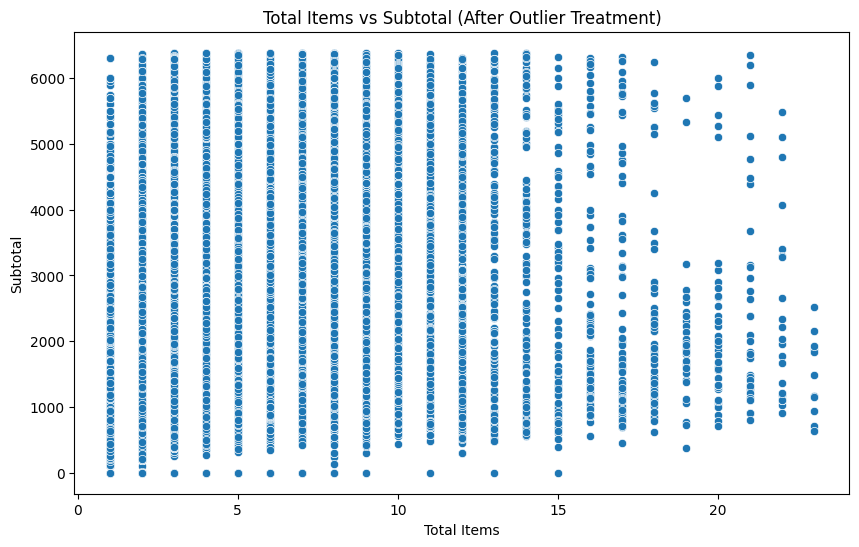

In [154]:
## Total items vs subtotal

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'total_items', y = 'subtotal', data = df_final_total)
plt.title('Total Items vs Subtotal (After Outlier Treatment)')
plt.xlabel('Total Items')
plt.ylabel('Subtotal')
plt.show()

/tmp/ipython-input-90920530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_category_counts.index, y=store_category_counts.values, palette='hls')


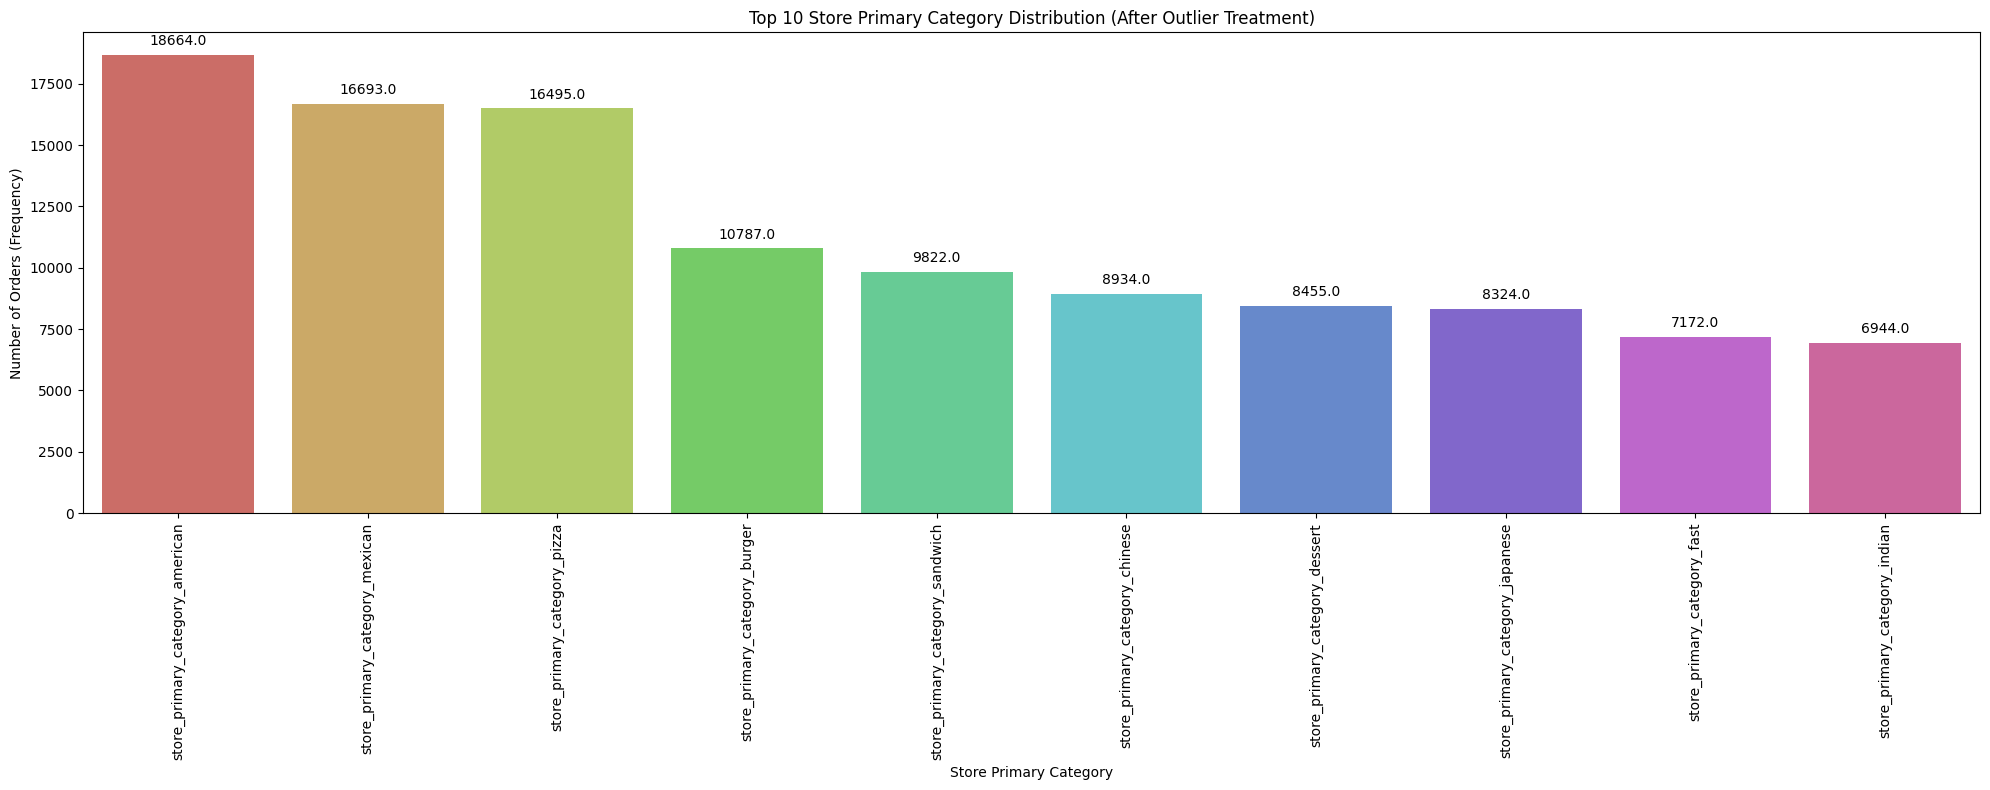

In [155]:
## Top 10 store primary category

plt.figure(figsize=(20, 8))

# Select columns that represent the one-hot encoded store primary categories
store_category_columns = [col for col in df_final_total.columns if col.startswith('store_primary_category_')]
store_category_counts = df_final_total[store_category_columns].sum().sort_values(ascending=False)[:10]

# Create a bar plot
sns.barplot(x=store_category_counts.index, y=store_category_counts.values, palette='hls')
plt.title('Top 10 Store Primary Category Distribution (After Outlier Treatment)')
plt.xlabel('Store Primary Category')
plt.ylabel('Number of Orders (Frequency)')
plt.xticks(rotation=90)
plt.tight_layout()
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

/tmp/ipython-input-263257958.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_protocol_counts.index, y=order_protocol_counts.values, palette='hls')


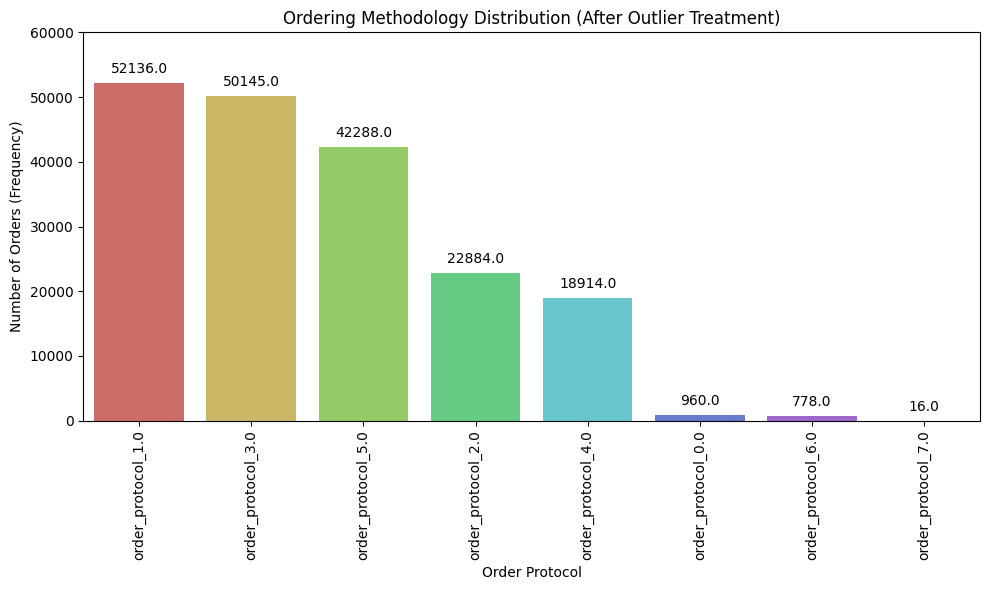

In [156]:
## Ordering methodology being used

plt.figure(figsize=(10, 6))

# Select columns that represent the one-hot encoded order protocols
order_protocol_columns = [col for col in df_final_total.columns if col.startswith('order_protocol_')]
order_protocol_counts = df_final_total[order_protocol_columns].sum().sort_values(ascending=False)
sns.barplot(x=order_protocol_counts.index, y=order_protocol_counts.values, palette='hls')
plt.title('Ordering Methodology Distribution (After Outlier Treatment)')
plt.xlabel('Order Protocol')
plt.ylabel('Number of Orders (Frequency)')
plt.xticks(rotation=90)
plt.ylim(0, 60000)
plt.tight_layout()
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

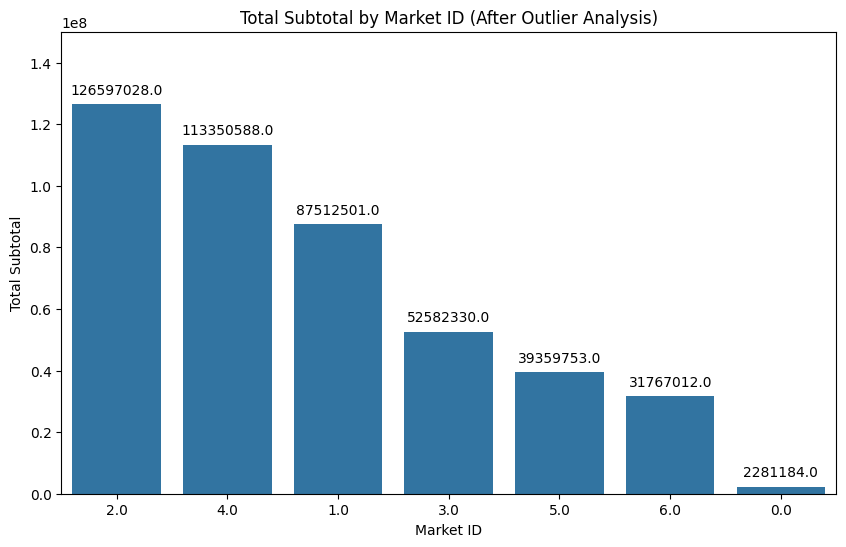

In [157]:
## Total Subtotal by Market ID

data_group = df_final_total.groupby('market_id')['subtotal'].sum().reset_index().sort_values('subtotal', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='market_id', y='subtotal', data=data_group, order=data_group['market_id'])
plt.title('Total Subtotal by Market ID (After Outlier Analysis)')
plt.xlabel('Market ID')
plt.ylabel('Total Subtotal')
plt.ylim(0,150000000)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

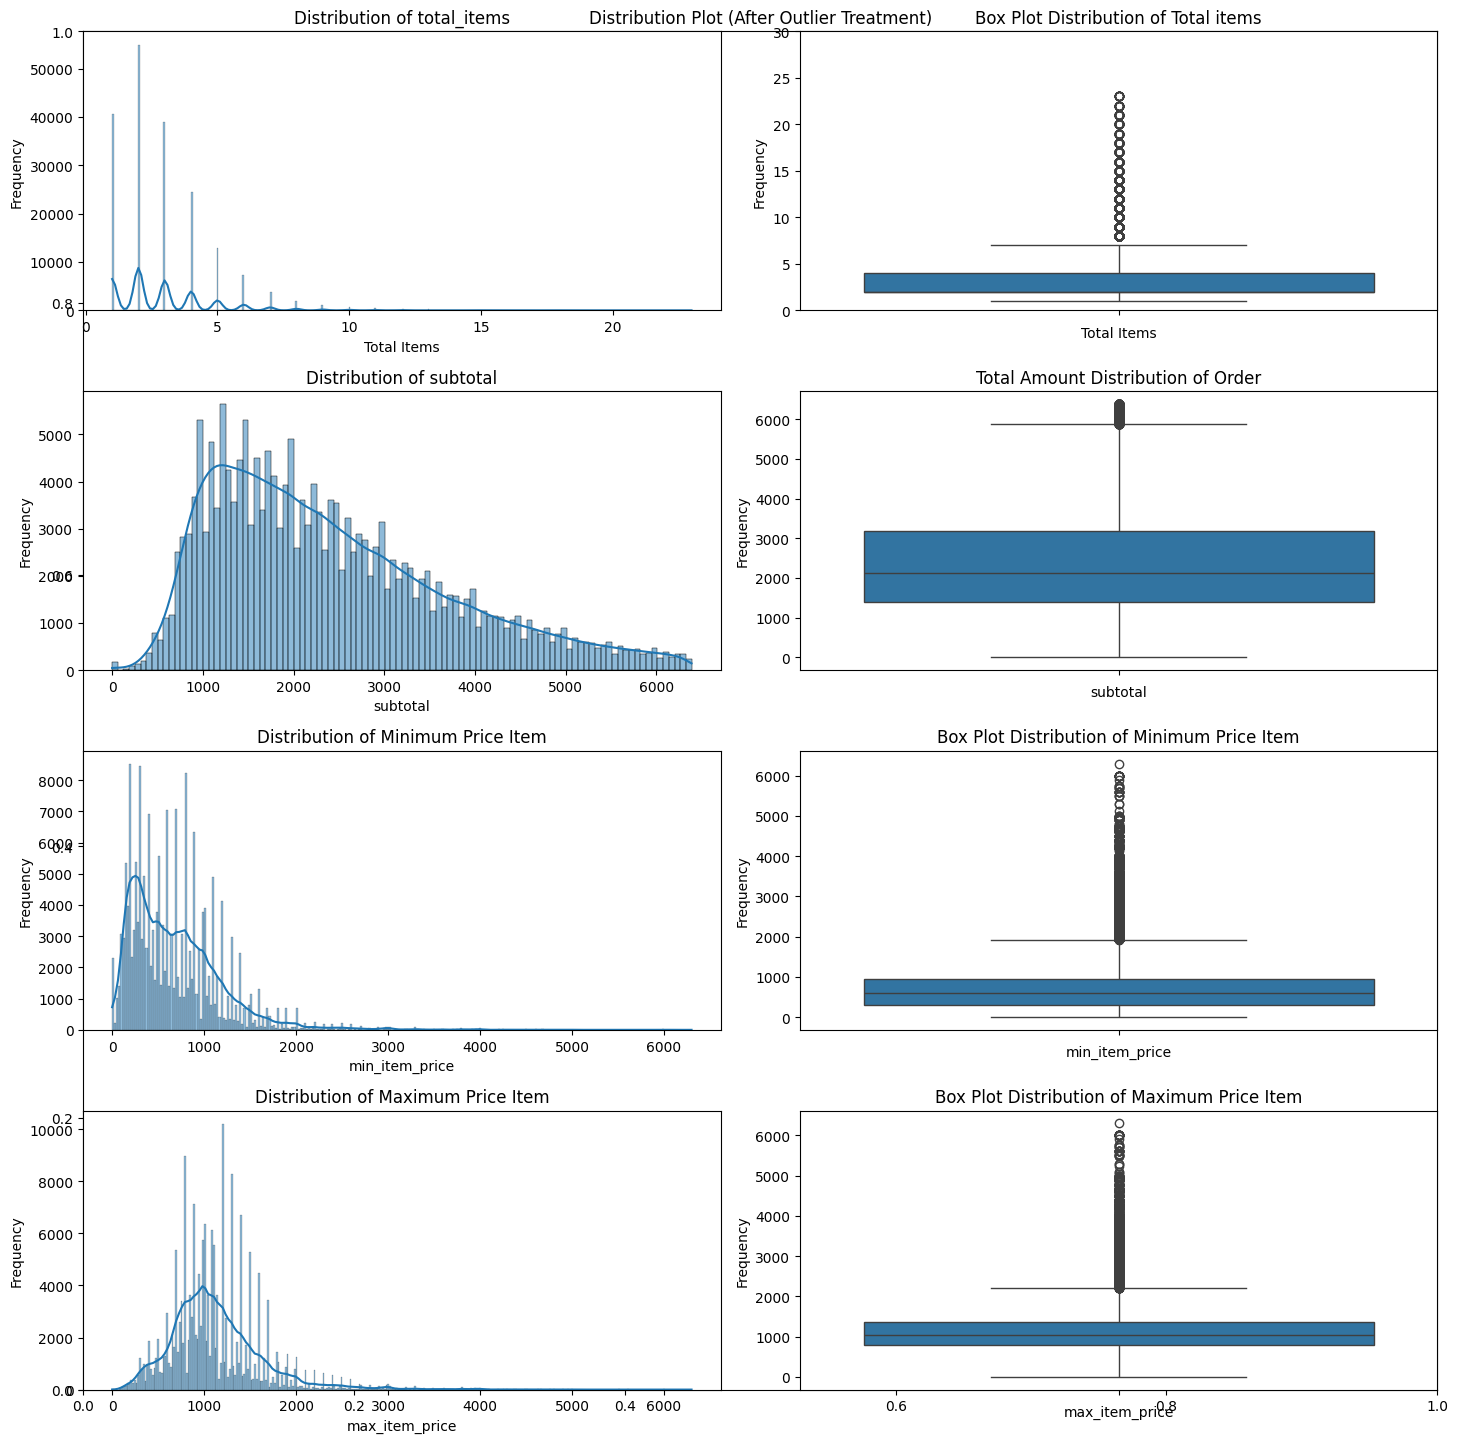

In [158]:
## Subplots (total_items, subtotal, min_item_price, and max_item_price)

plt.figure(figsize = (15,15))
plt.title('Distribution Plot (After Outlier Treatment)')

plt.subplot(4,2,1)
sns.histplot(df_final_total['total_items'], kde = True)
plt.title('Distribution of total_items')
plt.xlabel('Total Items')
plt.ylabel('Frequency')

plt.subplot(4,2,2)
sns.boxplot(df_final_total['total_items'])
plt.title('Box Plot Distribution of Total items')
plt.xlabel('Total Items')
plt.ylim(0, 30)
plt.ylabel('Frequency')

plt.subplot(4,2,3)
sns.histplot(df_final_total['subtotal'], kde = True)
plt.title('Distribution of subtotal')
plt.xlabel('subtotal')
plt.ylabel('Frequency')

plt.subplot(4,2,4)
sns.boxplot(df_final_total['subtotal'])
plt.title('Total Amount Distribution of Order')
plt.xlabel('subtotal')
plt.ylabel('Frequency')

plt.subplot(4,2,5)
sns.histplot(df_final_total['min_item_price'], kde = True)
plt.title('Distribution of Minimum Price Item')
plt.xlabel('min_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,6)
sns.boxplot(df_final_total['min_item_price'])
plt.title('Box Plot Distribution of Minimum Price Item')
plt.xlabel('min_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,7)
sns.histplot(df_final_total['max_item_price'], kde = True)
plt.title('Distribution of Maximum Price Item')
plt.xlabel('max_item_price')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.boxplot(df_final_total['max_item_price'])
plt.title('Box Plot Distribution of Maximum Price Item')
plt.xlabel('max_item_price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3361239088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'day_of_week', data = df_final_total, palette = 'hls')


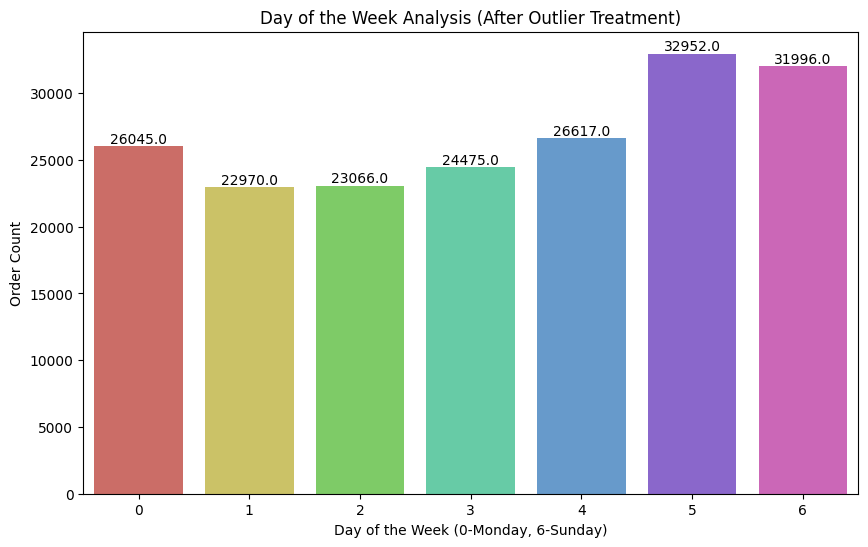

In [159]:
## Day of week by order counts

plt.figure(figsize = (10,6))
sns.countplot(x = 'day_of_week', data = df_final_total, palette = 'hls')
plt.title('Day of the Week Analysis (After Outlier Treatment)')
plt.xlabel('Day of the Week (0-Monday, 6-Sunday)')
plt.ylabel('Order Count')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.show()

**Observations:** After the outlier treatment, not much change was address on aspect of the analysis perspective. Which means the data was a normal fit based on the outlier analysis made.

1. **Sunday** and **Saturday** are the greatest orders and sales made on each store order made.
2. **Customer Spendings** a particular purchase make up to estimate of **3900** which gives more quality assurance and reliability of each product.
3. **Market ID 2.0** and **4.0** be a great location of purchase for all customers making it more profitable giving returns of more than **12 Crores**.
Average sales made by each of Market Locations come up to **3-4 Crores**.
Unknown Locations accounts upto **1000** or more of revenue which should be checked through properly.
4. **Order Protocols** such as **Call to Restaurant by Delivery person, Takeaways** and **Prebooked orders** are the common type of methods followed by each Customers which works out.



##**5.1. Delivery Duration Analysis**


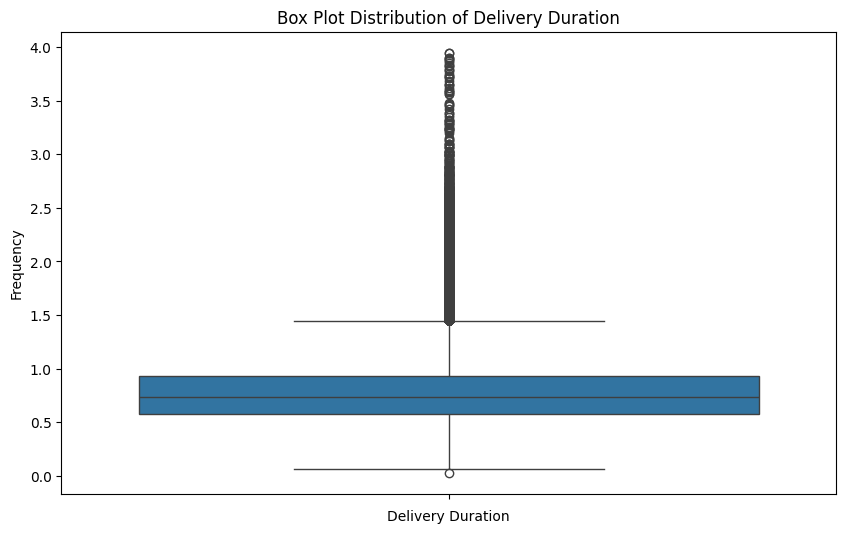

In [160]:
## Delivery Deuration box plot

plt.figure(figsize = (10,6))
sns.boxplot(df_final_total['delivery_duration'])
plt.title('Box Plot Distribution of Delivery Duration')
plt.xlabel('Delivery Duration')
plt.ylabel('Frequency')
plt.show()

In [161]:
print("The Normal Delivery Duration of an Order is between",round(min(df_final_total['delivery_duration']) * 60,2),"and",round(df_final_total['delivery_duration'].quantile(0.75)) * 60,"mins")

The Normal Delivery Duration of an Order is between 1.68 and 60 mins


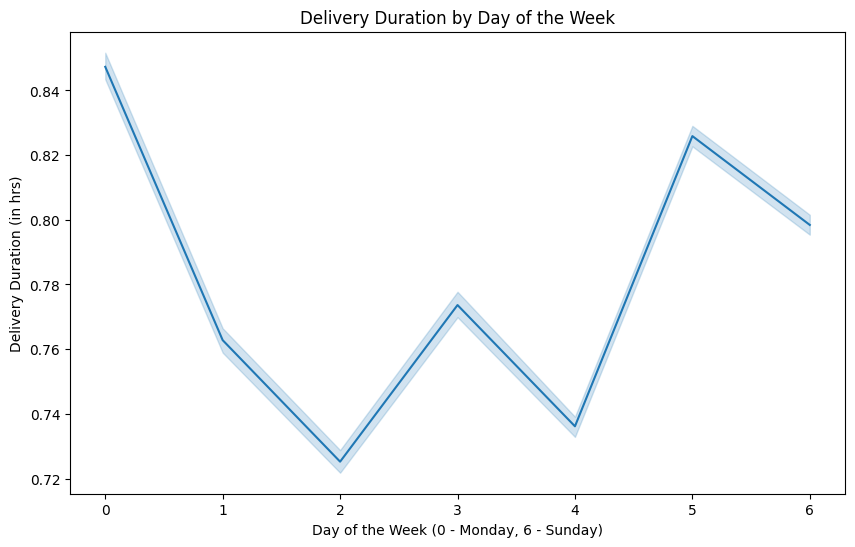

In [162]:
## Delivery duration on day of the week basis

plt.figure(figsize = (10,6))
ax = sns.lineplot(x = 'day_of_week', y = 'delivery_duration', data = df_final_total)
plt.title('Delivery Duration by Day of the Week')
plt.xlabel('Day of the Week (0 - Monday, 6 - Sunday)')
plt.ylabel('Delivery Duration (in hrs)')
plt.show()

- Monday and Saturday gives the more delivery duration to be taken.

In [163]:
## Delivery Duration range

print("Regular delivery duration is between",round(df_final_total.groupby('day_of_week')['delivery_duration'].mean().min(),2) * 60,"and", round(df_final_total.groupby('day_of_week')['delivery_duration'].mean().max(),2) * 60, "within each of the day of a week at a further scale")

Regular delivery duration is between 43.8 and 51.0 within each of the day of a week at a further scale


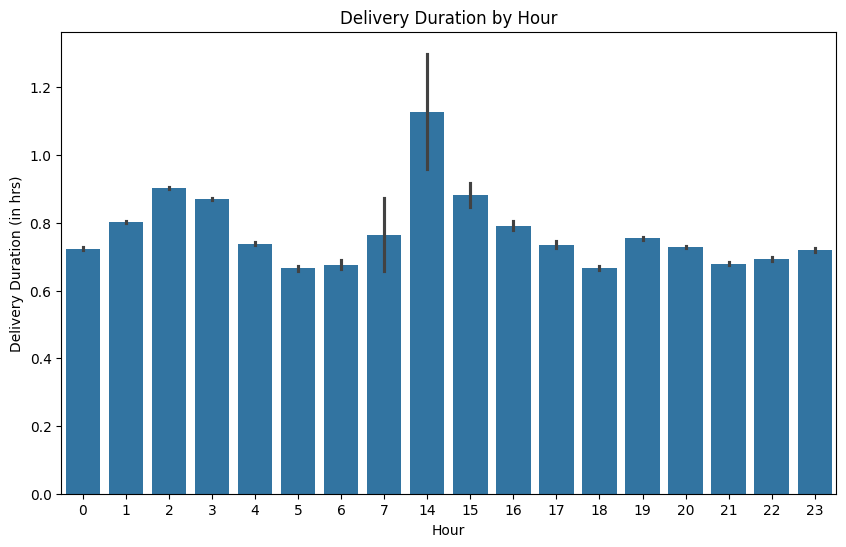

In [164]:

## Delivery Duration by hour

plt.figure(figsize = (10,6))
sns.barplot(x = 'hour', y = 'delivery_duration', data = df_final_total)
plt.title('Delivery Duration by Hour')
plt.xlabel('Hour')
plt.ylabel('Delivery Duration (in hrs)')
plt.show()


Text(0, 0.5, 'Frequency')

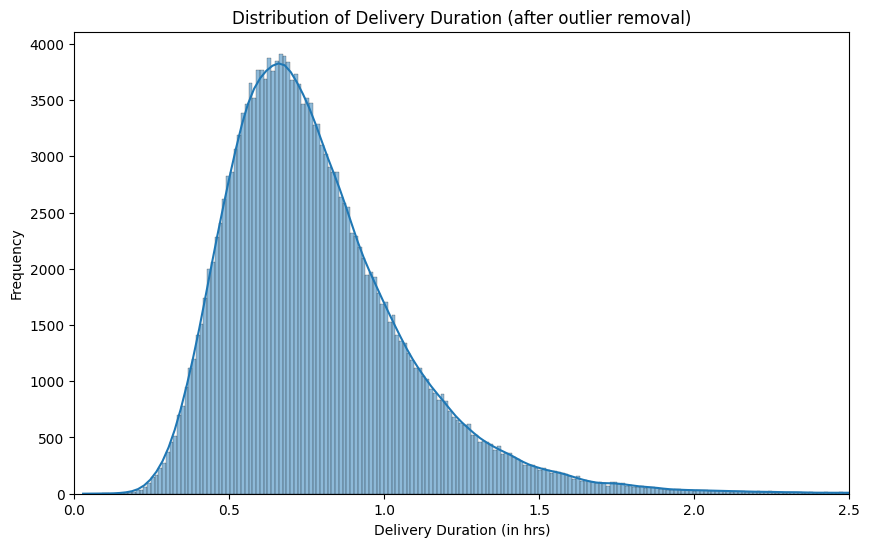

In [165]:
## Delivery duration distribution

plt.figure(figsize = (10,6))
sns.histplot(df_final_total['delivery_duration'], kde = True)
plt.title('Distribution of Delivery Duration (after outlier removal)')
plt.xlabel('Delivery Duration (in hrs)')
plt.xlim(0, 2.5)   ## Adjustment on the x-limit of the plot
plt.ylabel('Frequency')

/tmp/ipython-input-332135952.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'hour', data = df_final_total, palette = 'hls')


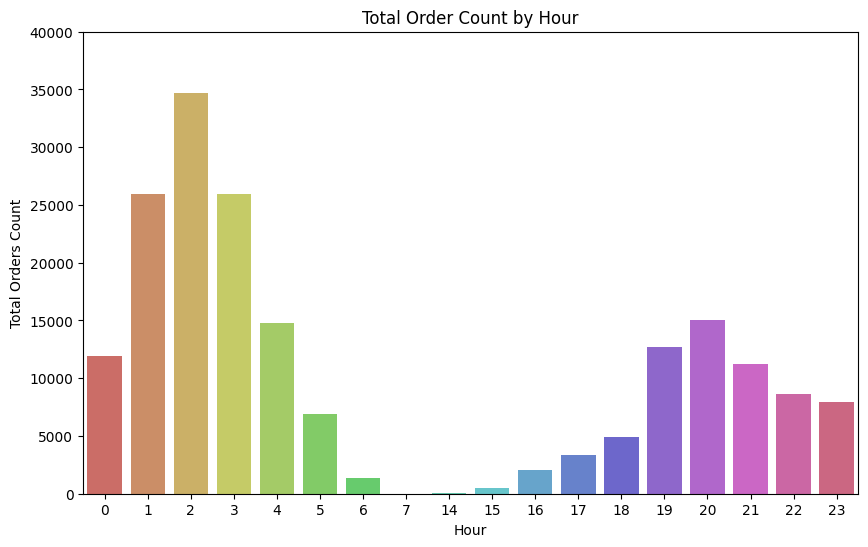

In [166]:
## Total order count by hours

plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'hour', data = df_final_total, palette = 'hls')
plt.title('Total Order Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Orders Count')
plt.ylim(0, 40000)
plt.show()

**Observations:**

- The Range of delivery duration is from **1.68 to maximum of 3.94** indicating around **1 minute to 4hrs** at extereme cases (order mismatch, Traffic or system issues). ***Normal delivery is usually till 43 minutes***.


- From mornings **12AM - 4AM** and evenings **7PM - 9PM** gives a higher count exceeding 10000 on order count making it a busiest hour for **business on sales** making sure these timings are well suited for **Dinner and Midnight offers.**

- Orders are lesser with **2PM** giving it the **busiest hour on traffics** indicating **lesser orders** and **minimal sales** being generated.

- From **8 AM - 13 AM** is considered not much sales during these hours indicating more number of work schedules for customers and a huge gap required to be filled during this period of time by different business stratergies.

##**5.2. Correlation Analysis**

In [167]:
col = ['subtotal','total_items','min_item_price','max_item_price']

In [168]:
pearson_coeff = df_final_total[col].corr(method = 'pearson')
pearson_coeff

,subtotal,total_items,min_item_price,max_item_price
subtotal,1.000000,0.527056,0.056771,0.516372
total_items,0.527056,1.000000,-0.488845,-0.143214
min_item_price,0.056771,-0.488845,1.000000,0.569544
max_item_price,0.516372,-0.143214,0.569544,1.000000


In [169]:
spearman_coeff = df_final_total[col].corr(method = 'spearman')
spearman_coeff

,subtotal,total_items,min_item_price,max_item_price
subtotal,1.000000,0.629531,0.034736,0.572584
total_items,0.629531,1.000000,-0.619547,-0.067343
min_item_price,0.034736,-0.619547,1.000000,0.446974
max_item_price,0.572584,-0.067343,0.446974,1.000000


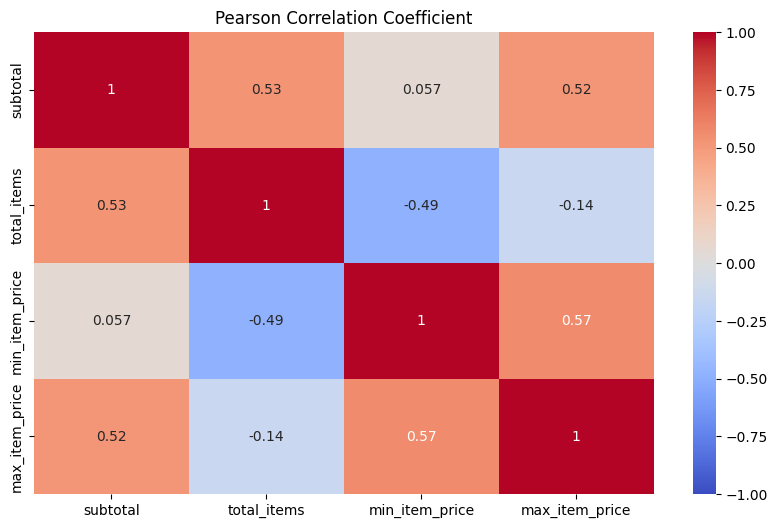

In [170]:
## Plotting pearson coefficient

plt.figure(figsize=(10,6))
sns.heatmap(pearson_coeff, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Pearson Correlation Coefficient')
plt.show()

**Observations:**

1. The Subtotal and The total items brought by the customers shows a **moderate positive relationship (0.53)** giving a moderate linear relationship implying that
the customers take on any of the items gives them a high profitable base on **leveraging its sales turnover**.

2. Subtotals and max item price gives a **moderately positively correlation (0.52)** which means for an item bought by a customer that generated a maximum pricing within other orders made give a heavy input towards the sales of the particular organisation which could help to **elevate its business growth**.

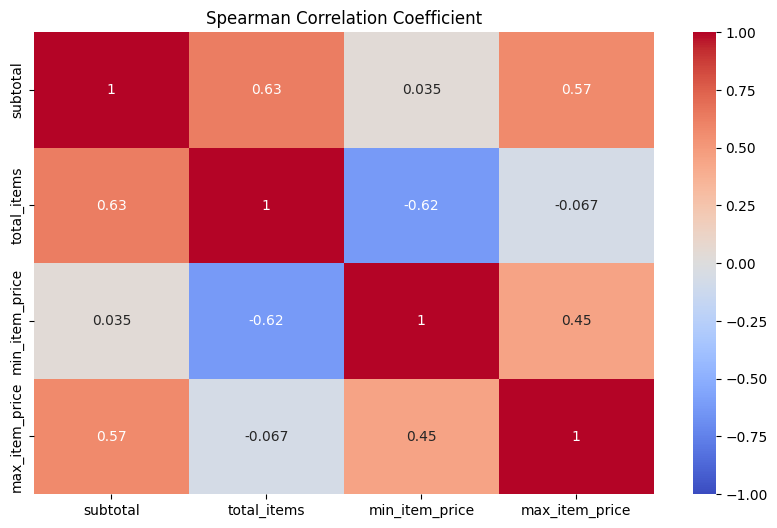

In [171]:
## Plotting spearman coefficient

plt.figure(figsize=(10,6))
sns.heatmap(spearman_coeff, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Spearman Correlation Coefficient')
plt.show()

**Observations:**

1. The relationship between Subtotals and total items is **moderately positive correlated (0.63)** meaning that the Items being purchased by the **customer is giving more revenue to the organisation** by increasing the subtotal of all its orders.

2. Subtotals between Minimum Item Price give a **very minimal correlation (0.035)** implying that not **more gap between the values in its pricing between Maximum Item** being got so the items purchased at this category does not give an implcation for a lower amount but unless or until offers nevertheless this could be a business stratergy where in the item pricing being high for a minimum priced product might be relaible towards the customers needs as its convinience and product quality plays a hige role and for Maximum Item Price (0.57) there is a **moderate positive correlation** giving more sales as the product pricing which is for a maximum item bought really increases the current profit by adding by the customers sutotal or the **total items purchased amount** being done.

3. Total Items and Maximum Item Price gives a really **weakly negative correlation** meaning that the **maximum pricing of an Item does not give a lot of incentives to the customer point of view** whereby just a quality assurance. On the other hand, for a Minimum Item gives a moderately strong relationship ensuring that the minimum item bought by the **customer might not give more customer satisfaction** as the items are well priced which increases as the goodwill of the company grows.

#**6. Feature Engineering**

In [172]:
df_final_total['partnership_ratio'] = df_final_total['total_busy_partners']/df_final_total['total_onshift_partners']

/tmp/ipython-input-67757586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_total['partnership_ratio'] = df_final_total['total_busy_partners']/df_final_total['total_onshift_partners']


In [173]:
df_final_inf = df_final_total[df_final_total['partnership_ratio'] != np.inf]
df_final_inf[['total_busy_partners','total_onshift_partners','partnership_ratio','total_outstanding_orders']].describe().round(2)


,total_busy_partners,total_onshift_partners,partnership_ratio,total_outstanding_orders
count,188082.00,188082.00,184675.00,188082.00
mean,41.73,44.50,0.96,56.49
std,30.75,33.01,0.39,50.41
min,0.00,0.00,0.00,0.00
25%,16.00,18.00,0.84,19.00
50%,39.00,41.00,0.98,44.81
75%,59.00,61.00,1.00,79.00
max,154.00,171.00,30.00,278.00


Here, based on the summary we have total busy partnership on a day it averagely comes upto **~42** and for onshift partners we have **~45** making it **1 to 2 partners** being deployed on an hourly basis. Logically speaking from **8 - 14 AM** not much orders are being placed so it gets nullified as a whole we have **24 - 7 = 16 hrs** . So in 16hrs we have **45 / 16** which means **averagely 3** mostly upto **5** can be especially on a weekend. Now partnership ratio gives us **0.96** making it a **perfect utilization** on delivery giving a better time optimization metric to be followed for meeting a better delivery purpose whereby this can also mean that people try to order more but limited capacity of workers in specific regions which needs a huge number of labour on that time job. Busy Partners can mean they have other orders to be made on contract basis from other apps or any other job this can also mean that their duty time is currently done. Nevertheless proper distribution have been shown throughout this summary which could help to generate a better remuneration from the partners perspective and unnecessary cost cuttings could be reduced. Lets see this through certain visualizations:

In [174]:
## Gross partnership ratio

sum(df_final_total['total_busy_partners'])/sum(df_final_total['total_onshift_partners'])

0.9376310894492418

In [175]:
def categorize_ratio(row):
  busy = row['total_busy_partners']
  onshift = row['total_onshift_partners']

  if onshift == 0:
    if busy == 0:
      return "Inaccurate data"
    else:
      return "All Partners are busy"

  ratio = busy/onshift
  if ratio == 1:
    return "Perfect Utilization of Partners (Supply = Demand)"
  elif ratio < 1:
    return "Idle Capacity (Supply > Demand)"
  else:
    return "Overloaded Capacity (Supply < Demand)"

In [176]:
df_final_total['partnership_status'] = df_final_total.apply(categorize_ratio, axis = 1)

/tmp/ipython-input-2085988663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_total['partnership_status'] = df_final_total.apply(categorize_ratio, axis = 1)


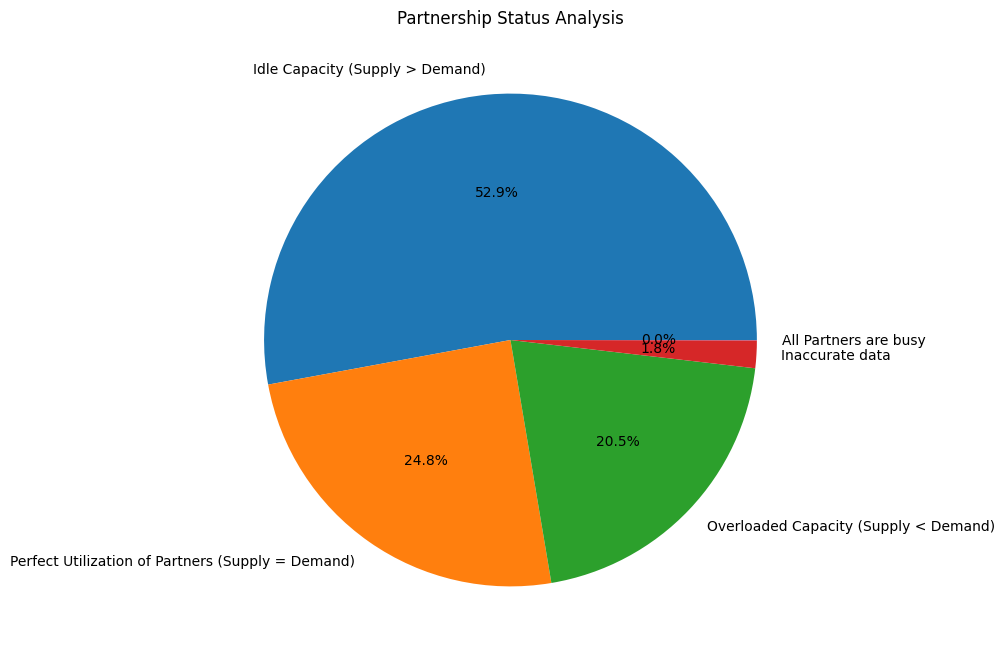

In [177]:
partnership_case_counts = df_final_total['partnership_status'].value_counts(ascending = False)
plt.figure(figsize = (8,8))
plt.pie(partnership_case_counts, labels = partnership_case_counts.index, autopct = '%1.1f%%')
plt.title('Partnership Status Analysis')
plt.show()

**- Terminologies to be discussed:**

1. **Perfect Utilization:** This is when the Supply of a product really resprocates to the needs or demand of the customer which would help the organisation to plan on future orders on a timely basis. This kind of balanced partnership ratio consisting of busy and onshift delivery partners which would help them to make a timely delivery and quality of conduct to be maintained.

2. **Overloaded Capacity:** Here, the demand for customer purchases are more than the number of supplies being made by the delivery team. In this Case, 20.5% of the customers have got this mode where the deliveries are busy as they are minimal, where the order placed by a customer could be getting it in a very late timing or would question the food condition as it might be expesed to extreme situations which could cause problems in the future making it a less reliable if this prevail within the ordering time.

3. **Idle Capacity:** This could mean that the supplies are heavily available for deliveries where in lesser number of customers order during this particular timing. In our analysis, majority number of deliveries have been followed follwong this methodology which could be a problem on the unnecessary cost factors being burned down , i.e. , waiting for customers by delivery agents would fuel out their mode of transport causing to pay a huge bear from the company side. Nevertheless, this approach actually contributes to more sales and revenue generation at a high scales as these might be an increase towards the labour promoting more sales for the organisation where a certain share of the amount would be to fix the petrol, diesel, etc.

4. **Inaccurate Data (Undefined Case):** This is relevant in some of the datapoint being investigated to pull out more insights. Should be avoidable as proper data quality is not being catered.

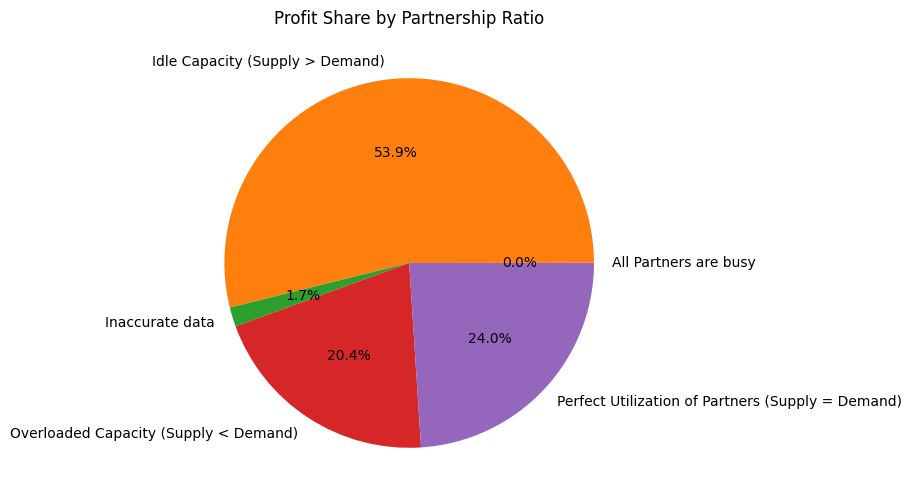

In [178]:
## Profit Share by the partnership ratio

df_profit_share = df_final_total.groupby('partnership_status')['subtotal'].sum().reset_index()

plt.figure(figsize = (10,6))
plt.pie(df_profit_share['subtotal'], labels = df_profit_share['partnership_status'], autopct = '%1.1f%%')
plt.title('Profit Share by Partnership Ratio')
plt.show()

**Observation:**

1. There is a **1% margin** based on its profit being contributed based on orders being made by customers for **Idle Capacity** as a high number of suppliers would be running for deliveries that could help the customer to get for a reasonable price as much of a tipping might not be required at this timing whereby this methodology actually works out on a large scale basis on all places.

2. A very lesser amount of decrease in **Overloaded Capacity (~ -0.1)** does not change more on its profit as it give directly proportionality towards the sales amount generated.

3. There is a slight decrease of **Perfect Utilization** by **-0.4** which gave a sight loss on the revenue generated. This can be also due to external factors like toll pass, etc.

/tmp/ipython-input-1656483044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df_delivery_avg.index, y = df_delivery_avg.values, palette = 'hls')


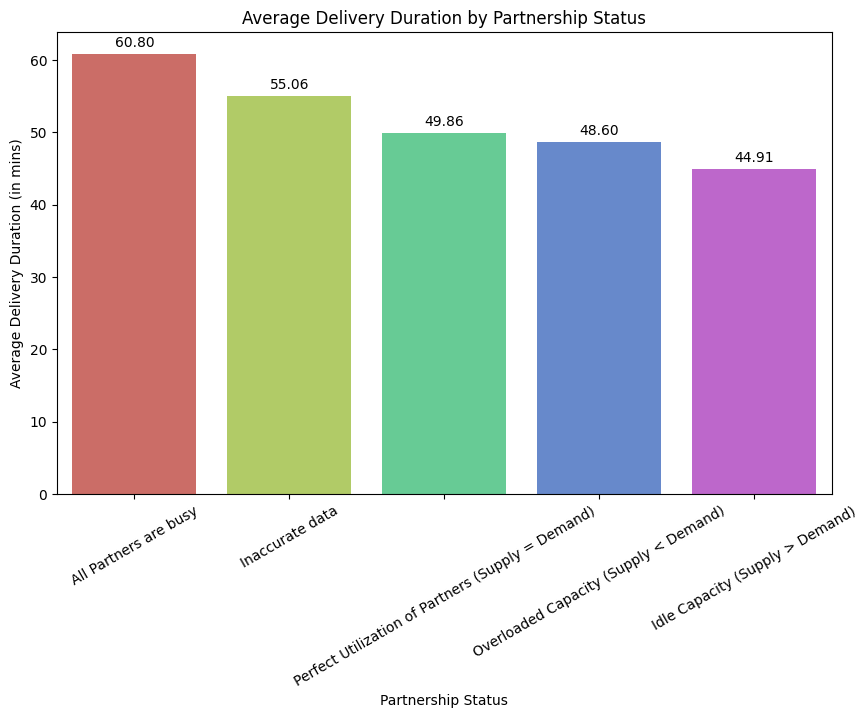

In [179]:
## Average of delivery duration by partnership status

df_delivery_avg = df_final_total.groupby('partnership_status')['delivery_duration'].mean().mul(60).round(2).sort_values(ascending = False)

plt.figure(figsize = (10,6))
ax = sns.barplot(x = df_delivery_avg.index, y = df_delivery_avg.values, palette = 'hls')
plt.title('Average Delivery Duration by Partnership Status')
plt.xlabel('Partnership Status')
plt.ylabel('Average Delivery Duration (in mins)')
plt.xticks(rotation = 30)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

**Observation:**

1. All the delivery are done between **44.9 minutes to 1 hr** giving an interpretation based on each category of them.

2. The category **All Partners are busy** gives a **higher latency** or a waiting time of 1hr for the food to be delivered which is recorded to be the highest among all the groups.

3. **Perfect Utlization of employees** who get the timely delivers from each customer gives a delay on delivery time to the customer as these places could be far from the city or any **busy timing** which could eventually make the delivery a bit late towards the customers.

4. **Overloaded capacity** makes sure to reach without a delay of time by **48.6 minutes making** sure each orders to be given to other customers on a successive timeframe.

5. **Inaccurate data** does not give a clear picture on the delivery for the item by a delivery person mostly resulting to **manual pickups or other source of unauthorized delivery** which takes a duration of around **48.38 minutes**.

6. **Idle Capacity** gives an item at a higher pace as in this mode of delivery for approxiamately **~45 minutes** where more supplies are ready to deliver but not much interest with respect to the customer delivery point of view

/tmp/ipython-input-4105823722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_delivery_avg.values, y=df_delivery_avg.index, palette='hls')


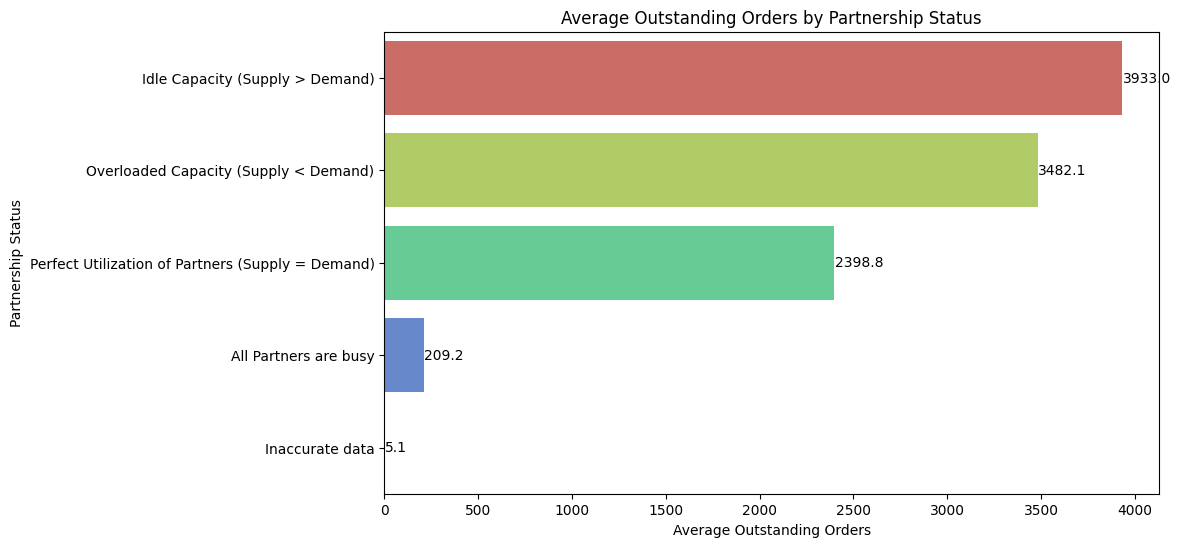

In [180]:
## Avergae Outstanding Order by Delivery Category

df_delivery_avg = df_final_total.groupby('partnership_status')['total_outstanding_orders'].mean().mul(60).round(2).sort_values(ascending = False)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_delivery_avg.values, y=df_delivery_avg.index, palette='hls')
plt.title('Average Outstanding Orders by Partnership Status')
plt.xlabel('Average Outstanding Orders')
plt.ylabel('Partnership Status')

for i, v in enumerate(df_delivery_avg.values):
    ax.text(v + 0.5, i, f'{v:.1f}', color='black', va='center')

plt.show()


**Observations:**

1. **More number of Idle Capacity partners** contribute to a higher outstanding orders making it not so efficient delivery to customers as uneven staffing is highly evident in most of the data contributinf to **50%** of the sales by this type of category making it not a proper methodology for sales on a long run.

2. **Overloaded deliveries by partners** as the **increase in demand** can cause more **decimination** on the quality of food also as the orders stack up for these delivery partners it makes them difficult for each of them onshifts as lower labour available for a particular timing on delivery making it more burden and difficult for a partner.

3. Perfect Utilization can have these **outstanding orders** of **2251.2** as the target achieving on delivery would be consuming a bit more time even though timely delivery assurance is capable for a partner. **Traffic congestion and road workouts** can be an external factors that would be a major issie in this particular category.

4. **Busy Partners** contributed to average of **209.2** making it one of the least among the other categories tells us that **Lesser orders** are outstanding as most of the partners are busy during this time frame. Most of the orders incoming would not be accepted by the partner.

5. **Inaccurate data** gives a very minimum percentage of **0.9** outstandings as most of the records would be for manual pickups and other unauthorized agency where in the data might not be recorded resulting in an inaccurate result in the values.

In [181]:
## Hour on a day heat map for idle partnership

plt.figure(figsize = (10,6))
df_idle = df_final_total[df_final_total['partnership_status'] == 'Idle Capacity (Supply > Demand)']
df_idle_pivot = df_idle.pivot_table(index = 'hour', columns = 'day_of_week', values = 'total_outstanding_orders', aggfunc = 'sum')

<Figure size 1000x600 with 0 Axes>

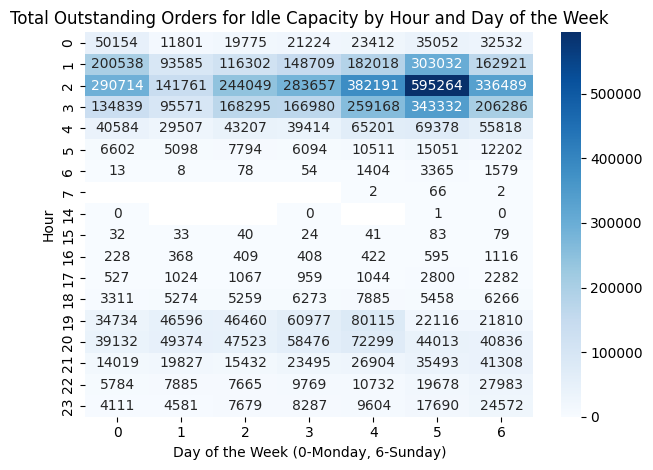

In [182]:
sns.heatmap(df_idle_pivot, cmap = 'Blues', annot = True, fmt = '.0f')
plt.title('Total Outstanding Orders for Idle Capacity by Hour and Day of the Week')
plt.xlabel('Day of the Week (0-Monday, 6-Sunday)')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

**- Observations:**

1. The total **outstanding orders** are higher after midnight by **1 AM - 3 AM** which are above **1 lakhs** registering a count of **~6 lakhs** as amaximum for a **Saturday** on a whole.

2. Lower orders on outstanding from **5 AM to 18 PM** making it that most of partners becomes perfectly utlized or overloaded within these hours were the tasks get delegated to atmost all the available onshift partners and proper delivery can be done.

3. No outstanding orders have been stated from **8 AM to 13 PM** this is due to the orders at that point are lesser from customer point of view where outstanding orders wont be reflecting.

**OUTSTANDING ORDERS BY PARTNERSHIP DEALINGS**

To understand which level of partnership category are having undistribution towards the number of orders which are to be given to each customer based on their delivery priority.

We calculate, Net Outstanding Orders per delivery = $\frac{Total Outstanding Orders}{Available partners}$


In [183]:
df_final_inf['partnership_status'] = df_final_inf.apply(categorize_ratio, axis = 1)

/tmp/ipython-input-2525748024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_inf['partnership_status'] = df_final_inf.apply(categorize_ratio, axis = 1)


In [184]:
df_final_inf['outstanding_orders_net'] = df_final_inf['total_outstanding_orders'] / df_final_inf['total_onshift_partners']

/tmp/ipython-input-320715064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_inf['outstanding_orders_net'] = df_final_inf['total_outstanding_orders'] / df_final_inf['total_onshift_partners']


In [185]:
df_final_inf_cleaned = df_final_inf[np.isfinite(df_final_inf['outstanding_orders_net'])].copy()

In [186]:
df_final_inf_cleaned[['outstanding_orders_net', 'partnership_ratio']].describe()

,outstanding_orders_net,partnership_ratio
count,184675.000000,184675.000000
mean,1.198997,0.955152
std,0.458871,0.385792
min,0.000000,0.000000
25%,0.969231,0.843373
50%,1.155556,0.977273
75%,1.444444,1.000000
max,47.000000,30.000000


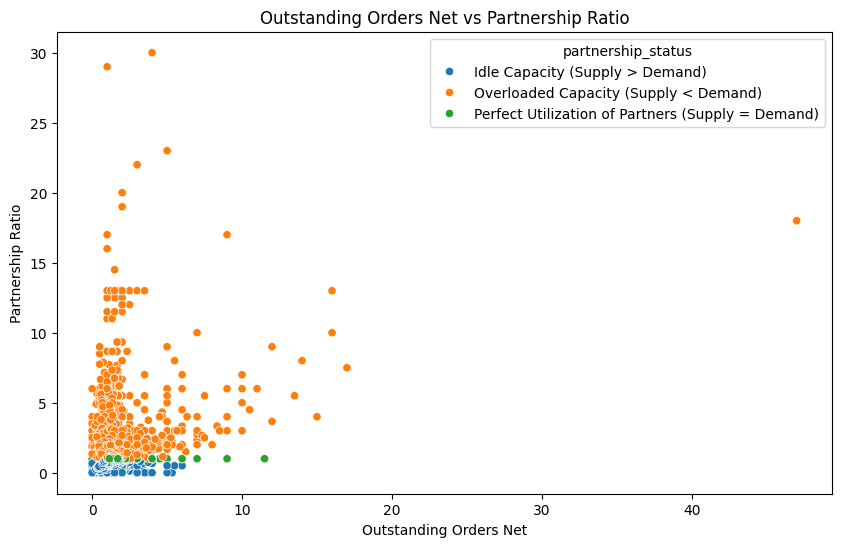

In [187]:
## Partnership ratio vs Outstanding Order net

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'outstanding_orders_net', y = 'partnership_ratio', hue = 'partnership_status', data = df_final_inf_cleaned)
plt.title('Outstanding Orders Net vs Partnership Ratio')
plt.xlabel('Outstanding Orders Net')
plt.ylabel('Partnership Ratio')
plt.show()


In [188]:
## Give me Outstanding Capacity and partnership ratio summary

df_final_inf_cleaned.groupby('partnership_status')['outstanding_orders_net'].describe()

,count,mean,std,min,25%,50%,75%,max
partnership_status,,,,,,,,
Idle Capacity (Supply > Demand),99512.0,1.093625,0.391884,0.0,0.826087,1.075000,1.354839,6.0
Overloaded Capacity (Supply < Demand),38587.0,1.428241,0.599527,0.0,1.163934,1.380952,1.642857,47.0
Perfect Utilization of Partners (Supply = Demand),46576.0,1.234206,0.374828,0.0,1.000000,1.090909,1.416667,11.5


**Observations:**

1. Most of the orders can be distributed within the delivery partners from **1-2 packages**. But certain cases come upto **10 orders** as well.

2. Idle Capacity addresses this issue of outstanding orders to making it reduce **0.05%** **(577 out of 99512)**

3. **Overloaded Capacity** is having the least reduction ratio this indicates most of the partners it is difficult for doing this as these addressing issues need to be taken forward on unaffected working hours as overtime where these delivery schemes should be incentivized or given for an extra work being carried out increasing their scale of pay by **2-3%**.

4. A **Balanced Utilized Partners** have only addressed **87 out of the total given 46576** making it that during the **normal working hours** with moderate number of orders it makes it difficult for a normal delivery partner to clear the outstanding orders out at this point of time.

**Insights and Reccomendation:**

- Higher deliveries and profit for an item comes from its quality and quantity which is noticaebly **American and Pizza food types** where each of this product gets a good number of orders on Saturday and Sundays, try to put a slightly higher pricing for product such as **10%, 20%** and incentivized based on customer count of a number (like 30 counts on purchase) this would help them to redeem the voucher making it a great source for two partities, ie, Company and Customer.

- **Prebooked orders, Call to restaurant directly by porters and Manual pickups** are the types of food deliveries which tops on the list. As we know that the first two are online delivery scheme wherein make it **chargeable on mile** basis is one way to get a **margin of profit**.

- Most of the people buy a product at a minimum pricing of **685.96** and upto maximum of **1127.75** where the Total Bill for an order would averagely be at **2410.31**. This contains that people of a spending nature or of a refined background try to make maximum utilization of being with the product due to its quality assurance and taste on each item. Try to give promotional offers for these set of people to invite a friend or food coupon on a week basis. This becomes a **stratergical understanding of building relations** and as the **increase on referrals** would recommend on buying a product based on its brand value and quality **enhancing customer satisfaction**.

- By the delivery duration analysis, a normal delivery would be within 43.8 to 51 minutes this considers on the factors of traffic congestion, stack of orders, etc. There are even cases that take extreme time of **exceeding 2hrs**. Delivery Schemes to be strictly monitored as delay of food orders could reduce the number of future orders on a non-demanding place. So proper time maintainence on food delivery is a **huge constraint** to be followed as this would decrease the rate of Idle Capacity and Overloaded Capacity making Perfect Utilization a better choice for a greater delivery purpose. Marketing and Operations Coordinators should discern for bringing this into light on a future note.

- Delivery Duration on **2 PM and 8 PM** are the highest busiest schedules registered. Charge tip of **2.5 - 5%** from the customer as on this note a reduction on orders on peak hours and highest orders on the non-peak orders would work out to **balance out the ordering timings**.

- Through Net **Outstanding order by partner** it is evident to be observed that Idle Capacities have **higher density in number** whereby the maximum outstanding orders to be addressed would be **6 packages per partner on delivery**. On contrast, we have Overutilized Orders giving a cap of **47 orders** which have to done per customer basis making it sparsely populated which futher away from the origin of point and for **Perfect Utlization** it is reduced but approxiamately **11 - 12 orders per partners**.

- Mathematically, **8 AM - 13 PM** on a day over average gives no orders. So on a week, we have **6 x 7 = 42**. All these orders of **47 dues** for Overutlized partners as well as **11 - 12 orders** can be addressed towards this timing. So, $\frac{(47 + 12 + 6)}{42} = \frac{65}{42}$ = **1 - 2 orders** can be divided to all these category making it an ideal choice for
considering this burden on an equally shared basis.

This would help the category of all partners to manage their time and recieve rewards on a fair basis.

**Done By Jeff Jose Paliakara
Data Analytics Live Program (Batch-3)**